In [9]:
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the Q-network
class QNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(state_size, 24)
        self.fc2 = nn.Linear(24, 24)
        self.fc3 = nn.Linear(24, action_size)

    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Initialize environment and parameters
env = gym.make("CartPole-v1")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
episodes = 500
learning_rate = 0.001
gamma = 0.95
epsilon = 1.0  # Initial exploration rate
epsilon_min = 0.01
epsilon_decay = 0.995

# Create Q-network and optimizer
q_network = QNetwork(state_size, action_size)
optimizer = optim.Adam(q_network.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

# Initialize list to store rewards
episode_rewards = []

# Training Loop
for episode in range(episodes):
    state, _ = env.reset()  # Extract the state from the tuple
    state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)  # Convert to tensor and add batch dimension
    total_reward = 0
    
    for time in range(500):
        # Choose action using epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore: random action
        else:
            with torch.no_grad():
                q_values = q_network(state)
            action = torch.argmax(q_values).item()  # Exploit: best action
        
        # Take action in the environment
        next_state, reward, done, _, _ = env.step(action)
        next_state = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)
        total_reward += reward
        
        # Compute target Q-value
        with torch.no_grad():
            target = reward
            if not done:
                target += gamma * torch.max(q_network(next_state)).item()
        
        # Compute current Q-value
        q_values = q_network(state)
        target_f = q_values.clone()
        target_f[0][action] = target
        
        # Train the Q-network
        loss = criterion(q_values, target_f)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        state = next_state  # Move to the next state
        
        if done:
            break
    
    # Append total reward for this episode
    episode_rewards.append(total_reward)
    
    # Decay epsilon
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay
    
    print(f"Episode: {episode + 1}, Reward: {total_reward}")

# Close the environment
env.close()

# Save the model
torch.save(q_network.state_dict(), "q_network_cartpole.pth")


C:\Users\deepa\AppData\Roaming\Python\Python312\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode: 1, Reward: 26.0
Episode: 2, Reward: 24.0
Episode: 3, Reward: 32.0
Episode: 4, Reward: 38.0
Episode: 5, Reward: 12.0
Episode: 6, Reward: 66.0
Episode: 7, Reward: 15.0
Episode: 8, Reward: 16.0
Episode: 9, Reward: 19.0
Episode: 10, Reward: 13.0
Episode: 11, Reward: 15.0
Episode: 12, Reward: 16.0
Episode: 13, Reward: 10.0
Episode: 14, Reward: 45.0
Episode: 15, Reward: 15.0
Episode: 16, Reward: 13.0
Episode: 17, Reward: 17.0
Episode: 18, Reward: 17.0
Episode: 19, Reward: 37.0
Episode: 20, Reward: 13.0
Episode: 21, Reward: 14.0
Episode: 22, Reward: 24.0
Episode: 23, Reward: 23.0
Episode: 24, Reward: 33.0
Episode: 25, Reward: 12.0
Episode: 26, Reward: 24.0
Episode: 27, Reward: 21.0
Episode: 28, Reward: 14.0
Episode: 29, Reward: 24.0
Episode: 30, Reward: 13.0
Episode: 31, Reward: 40.0
Episode: 32, Reward: 36.0
Episode: 33, Reward: 17.0
Episode: 34, Reward: 15.0
Episode: 35, Reward: 12.0
Episode: 36, Reward: 32.0
Episode: 37, Reward: 18.0
Episode: 38, Reward: 36.0
Episode: 39, Reward: 

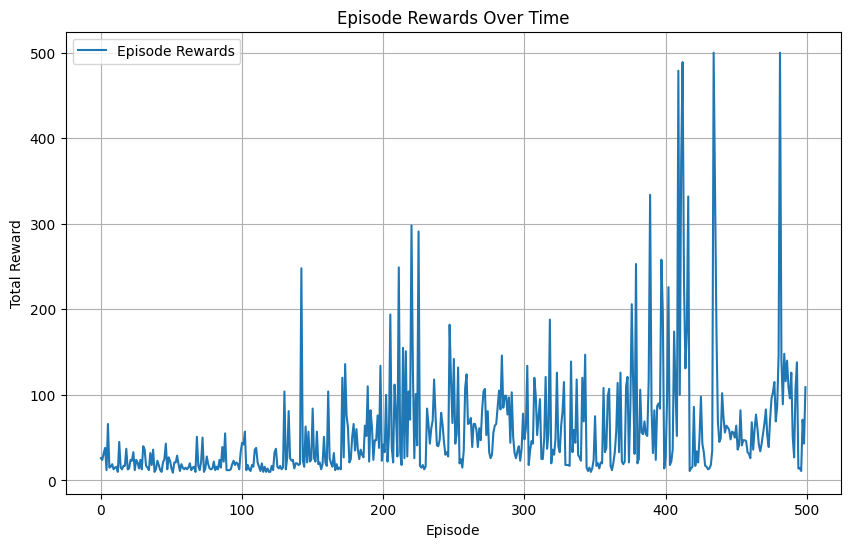

In [10]:
# Plot the episode rewards
plt.figure(figsize=(10, 6))
plt.plot(episode_rewards, label="Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Episode Rewards Over Time")
plt.legend()
plt.grid()
plt.show()


In [11]:
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [12]:
class QNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(state_size, 24)
        self.fc2 = nn.Linear(24, 24)
        self.fc3 = nn.Linear(24, action_size)

    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)


In [13]:
env = gym.make("CartPole-v1")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

episodes = 500
learning_rate = 0.001
gamma = 0.95
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995


In [14]:
q_network = QNetwork(state_size, action_size)
optimizer = optim.Adam(q_network.parameters(), lr=learning_rate)
criterion = nn.MSELoss()


In [15]:
episode_rewards = []

for episode in range(episodes):
    state, _ = env.reset()
    state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
    total_reward = 0

    for time in range(500):
        # Choose action using epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            with torch.no_grad():
                q_values = q_network(state)
            action = torch.argmax(q_values).item()
        
        # Take action in the environment
        next_state, reward, done, _, _ = env.step(action)
        next_state = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)
        total_reward += reward
        
        # Compute target Q-value
        with torch.no_grad():
            target = reward
            if not done:
                target += gamma * torch.max(q_network(next_state)).item()
        
        # Compute current Q-value and update
        q_values = q_network(state)
        target_f = q_values.clone()
        target_f[0][action] = target
        
        # Backpropagate loss
        loss = criterion(q_values, target_f)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        state = next_state
        if done:
            break

    episode_rewards.append(total_reward)
    epsilon = max(epsilon * epsilon_decay, epsilon_min)
    print(f"Episode: {episode + 1}, Reward: {total_reward}")

env.close()


Episode: 1, Reward: 21.0
Episode: 2, Reward: 12.0
Episode: 3, Reward: 28.0
Episode: 4, Reward: 10.0
Episode: 5, Reward: 10.0
Episode: 6, Reward: 9.0
Episode: 7, Reward: 25.0
Episode: 8, Reward: 14.0
Episode: 9, Reward: 23.0
Episode: 10, Reward: 19.0
Episode: 11, Reward: 23.0
Episode: 12, Reward: 25.0
Episode: 13, Reward: 26.0
Episode: 14, Reward: 14.0
Episode: 15, Reward: 9.0
Episode: 16, Reward: 32.0
Episode: 17, Reward: 34.0
Episode: 18, Reward: 15.0
Episode: 19, Reward: 16.0
Episode: 20, Reward: 30.0
Episode: 21, Reward: 10.0
Episode: 22, Reward: 28.0
Episode: 23, Reward: 20.0
Episode: 24, Reward: 18.0
Episode: 25, Reward: 33.0
Episode: 26, Reward: 12.0
Episode: 27, Reward: 21.0
Episode: 28, Reward: 13.0
Episode: 29, Reward: 9.0
Episode: 30, Reward: 16.0
Episode: 31, Reward: 13.0
Episode: 32, Reward: 24.0
Episode: 33, Reward: 13.0
Episode: 34, Reward: 15.0
Episode: 35, Reward: 15.0
Episode: 36, Reward: 10.0
Episode: 37, Reward: 20.0
Episode: 38, Reward: 21.0
Episode: 39, Reward: 17.

In [16]:
torch.save(q_network.state_dict(), "q_network_cartpole.pth")

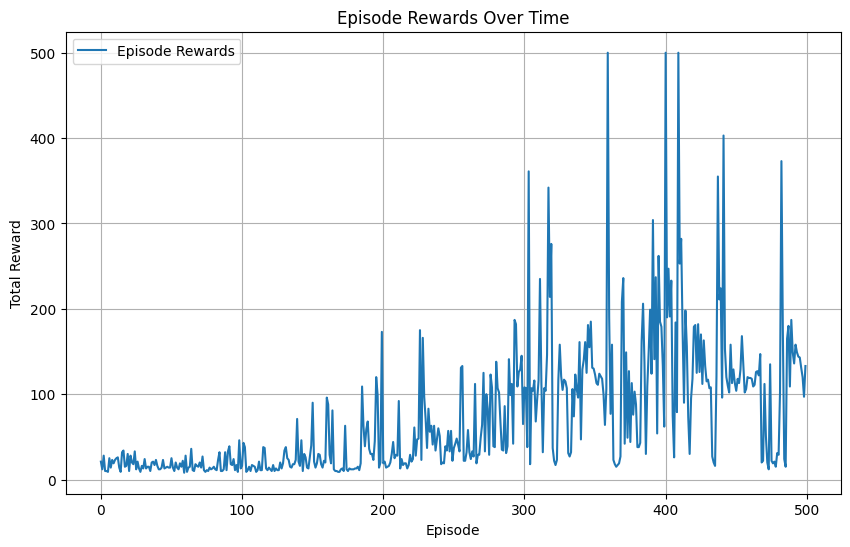

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(episode_rewards, label="Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Episode Rewards Over Time")
plt.legend()
plt.grid()
plt.show()
